In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

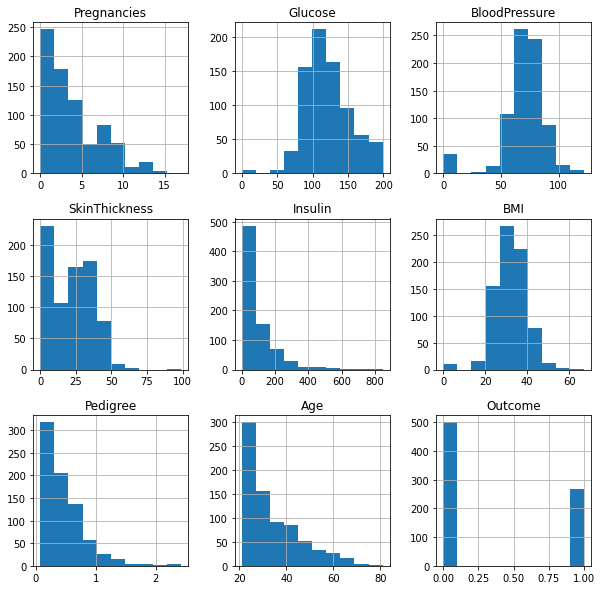

In [8]:
df.hist(figsize = (10,10))

Pregnancies         AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Glucose          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
BloodPressure       AxesSubplot(0.125,0.677439;0.352273x0.0920732)
SkinThickness    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Insulin             AxesSubplot(0.125,0.566951;0.352273x0.0920732)
BMI              AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Pedigree            AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Age              AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Outcome             AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dtype: object

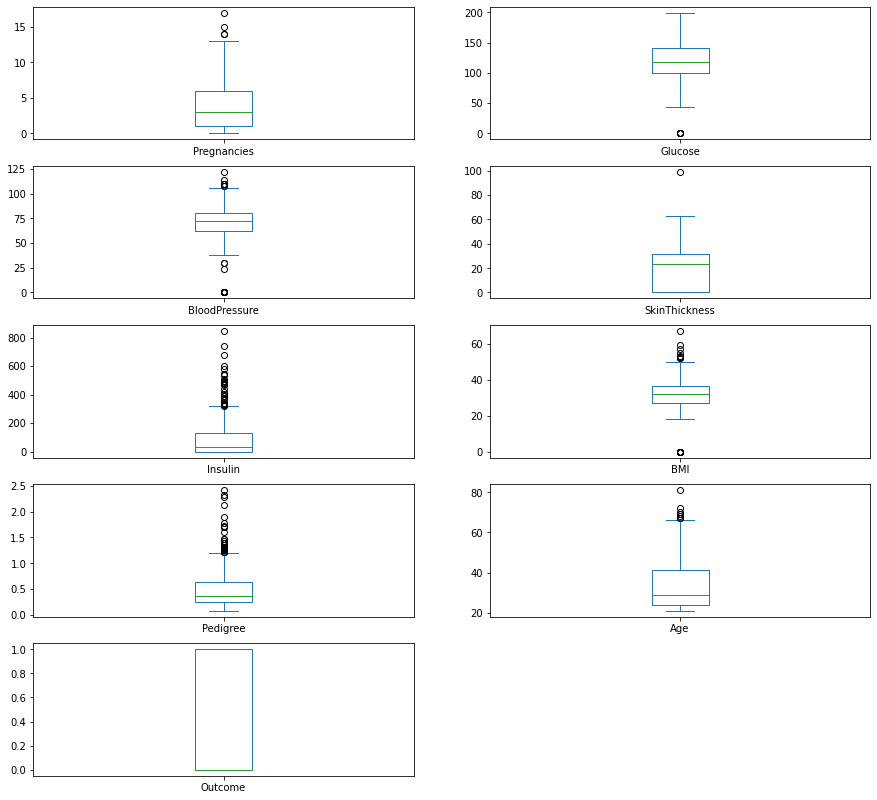

In [9]:
df.plot(kind = 'box', subplots = True, layout = (7,2),figsize=(15,20))

In [10]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
df = treat_outliers_all(df , df.columns.to_list())

Pregnancies         AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Glucose          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
BloodPressure       AxesSubplot(0.125,0.677439;0.352273x0.0920732)
SkinThickness    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Insulin             AxesSubplot(0.125,0.566951;0.352273x0.0920732)
BMI              AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Pedigree            AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Age              AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Outcome             AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dtype: object

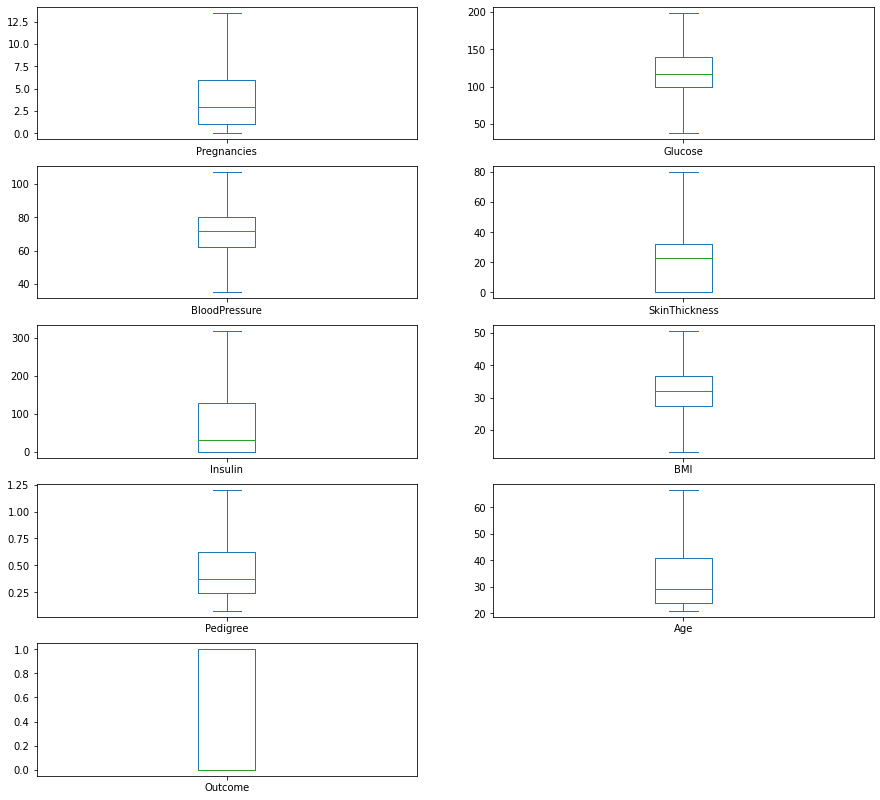

In [11]:
df.plot(kind = 'box', subplots = True, layout = (7,2),figsize=(15,20))

In [12]:
x = df.drop(['Outcome'], axis = 1)
y = df.Outcome

In [13]:
from sklearn.preprocessing import scale
x = scale(x)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Prediction",y_pred)

Prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 0]


In [26]:
from sklearn import metrics

print("Confusion matrix",metrics.confusion_matrix(y_test,y_pred))
print("KNN accuracy = ",metrics.accuracy_score(y_test,y_pred))

Confusion matrix [[132  18]
 [ 44  37]]
KNN accuracy =  0.7316017316017316


In [27]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,132,18,150
1,44,37,81
All,176,55,231


Text(0.5, 15.0, 'Predicted label')

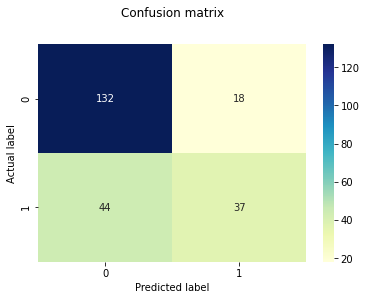

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
# Classification report
# Precision, Recall, F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.67      0.46      0.54        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [30]:
# Accuracy
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

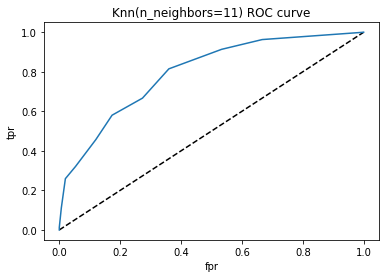

In [31]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7947325102880658